## 178. Rank Scores



**Change Log**   

| Date | Description |
| ---------- | ---------- |
| 2022-04-11 | Initialize |



## Summary

Rank the scores.

#### SQL Schema

```sql
Create table If Not Exists Scores (id int, score DECIMAL(3,2))
Truncate table Scores
insert into Scores (id, score) values ('1', '3.5')
insert into Scores (id, score) values ('2', '3.65')
insert into Scores (id, score) values ('3', '4.0')
insert into Scores (id, score) values ('4', '3.85')
insert into Scores (id, score) values ('5', '4.0')
insert into Scores (id, score) values ('6', '3.65')

```

Table: Scores

```
+-------------+---------+
| Column Name | Type    |
+-------------+---------+
| id          | int     |
| score       | decimal |
+-------------+---------+
```
id is the primary key for this table.  
Each row of this table contains the score of a game. Score is a floating point value with two decimal places.

## Problem

Write an SQL query to rank the scores. The ranking should be calculated according to the following rules:

- The scores should be ranked from the highest to the lowest.
- If there is a tie between two scores, both should have the same ranking.
- After a tie, the next ranking number should be the next consecutive integer value. In other words, there should be no holes between ranks.

Return the result table ordered by `score` in descending order.

The query result format is in the following example.

 

#### Example 1:

**Input:** 
```
Scores table:
+----+-------+
| id | score |
+----+-------+
| 1  | 3.50  |
| 2  | 3.65  |
| 3  | 4.00  |
| 4  | 3.85  |
| 5  | 4.00  |
| 6  | 3.65  |
+----+-------+
```
**Output:**
```
+-------+------+
| score | rank |
+-------+------+
| 4.00  | 1    |
| 4.00  | 1    |
| 3.85  | 2    |
| 3.65  | 3    |
| 3.65  | 3    |
| 3.50  | 4    |
+-------+------+
```

--- 

--- 

## Solution 1 - MSSQL

SQL Server (T-SQL) has the RANK() and DENSE_RANK() functions which will rank based on a partioned portion of the data.  The difference between the two is: 

RANK() will allow for gaps in the case of a tie (e.g., if two scores have the same rank of 5, both receive 5 and the next rank assigned will be 7).    

DENSE_RANK() does not allow for gaps.  Given the example above, the next rank assigned will be 6.

#### The Plan:
Select the scores from the table and the use the DENSE_RANK() function over the score partion.


```sql
SELECT  score, DENSE_RANK() OVER(ORDER BY score DESC) AS rank
FROM    Scores
ORDER BY score DESC
```

### Result

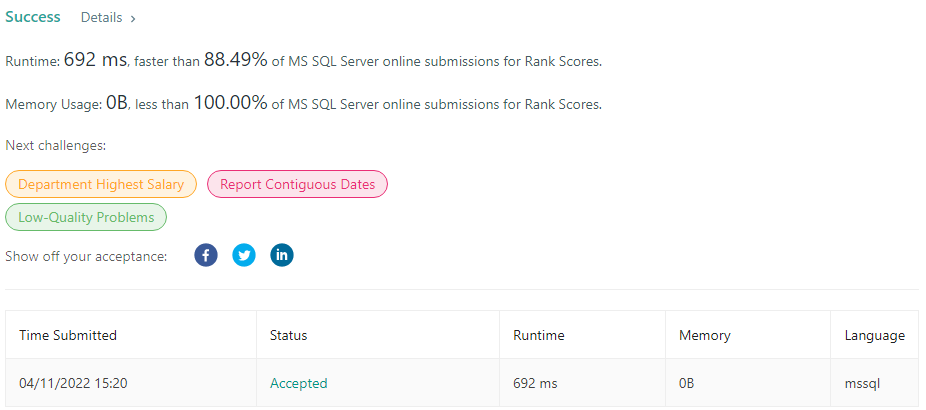



The results look good.

--- 

## Solution 2 - MSSQL - Add NOLOCK

Same as *Solution 1* except we add the NOLOCK table hint.


```sql
SELECT  score, DENSE_RANK() OVER(ORDER BY score DESC) AS rank
FROM    Scores (NOLOCK)
ORDER BY score DESC
```

### Result

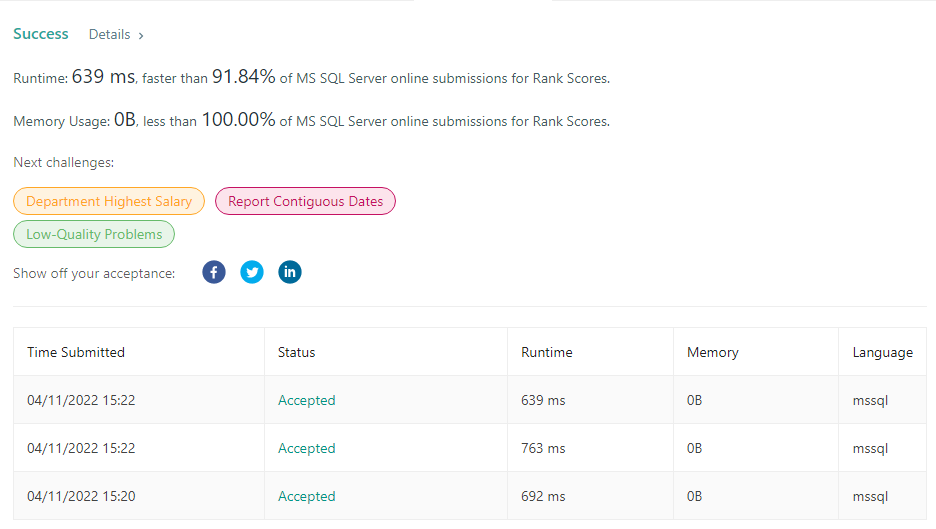

Nearly identical results with the `NOLOCK` directive.  

--- 

## Solution 3 - MySQL 

Pretty much the same thing in MySQL.  Note though we have to `escape` the alias name.  This may be because `rank` is a reserved word.

```sql
# Write your MySQL query statement below
SELECT      score
            , DENSE_RANK() OVER(ORDER BY score DESC) AS `rank`
FROM        Scores
ORDER BY    score DESC
;

```



### Result

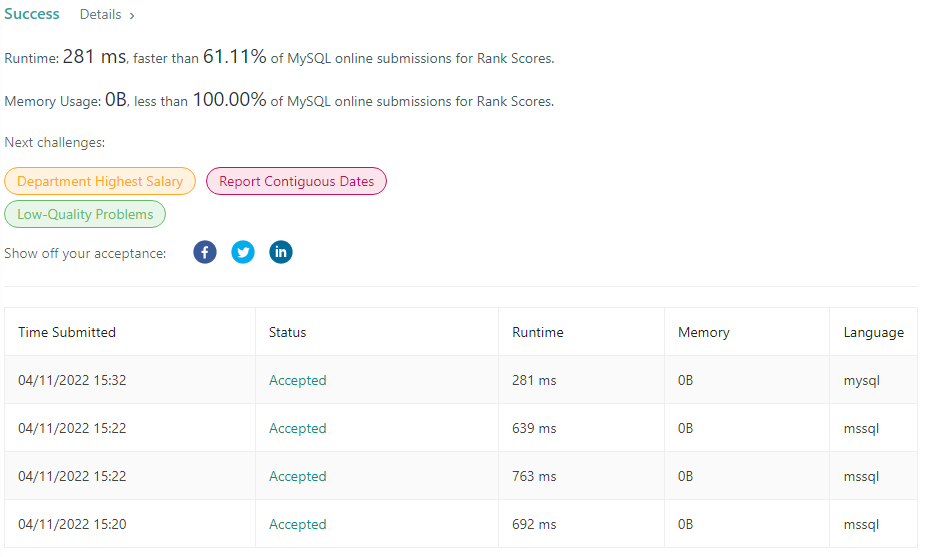


